In [1]:
import pandas as pd

In [86]:
Comments = pd.read_csv("Comments.csv")
Posts = pd.read_csv("Posts.csv")
Users = pd.read_csv("Users.csv")

array([[<AxesSubplot:title={'center':'CommentCount'}>]], dtype=object)

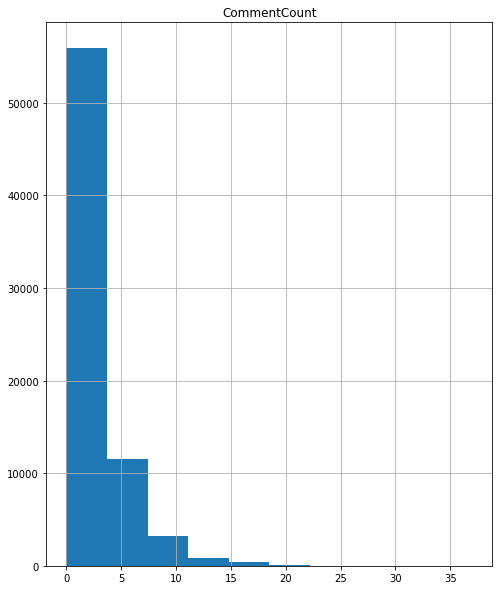

In [88]:
# Zadanie 1
Posts[['Id','CommentCount']].hist('CommentCount', figsize=(8,10))

In [92]:
# Zadanie 2
Posts[['Id','OwnerUserId','ViewCount']].groupby(['OwnerUserId'])\
.sum('ViewCount')\
.reset_index()\
.drop(['Id'], axis=1)\
.merge(Users[['Id','DisplayName']], left_on='OwnerUserId',right_on='Id')\
.sort_values(by='ViewCount', ascending=False)\
.head(1)[['DisplayName']]

,DisplayName
67,Mark Mayo


In [132]:
# Zadanie 3
Posts[Posts['AcceptedAnswerId']>=0].groupby('OwnerUserId')\
.count()\
.reset_index()\
.drop(['AnswerCount','ClosedDate','CommentCount','CommunityOwnedDate','CreationDate','FavoriteCount','Id','LastActivityDate','LastEditDate','LastEditorUserId','ParentId','PostTypeId','Score','Title','ViewCount'], axis=1)\
.rename(columns={'AcceptedAnswerId': 'count'})\
.merge(Users[['DisplayName','Id']], left_on='OwnerUserId',right_on='Id')\
.sort_values(by='count',ascending=False)[['DisplayName']]\
.head(2).tail(1)


,DisplayName
63,hippietrail


In [170]:
# Zadanie 4
C = Comments[['Id','PostId','Score']].groupby('PostId')\
.max()\
.reset_index()\
.drop(['Id'],axis=1)\
.rename(columns={'Score' : 'MaxScore'})

P = Posts[Posts['AcceptedAnswerId']>=0]

DF = P[['Id','Score']]\
.merge(C, left_on='Id', right_on='PostId')

n = len(DF[DF['Score']<DF['MaxScore']])
N = len(P)
n/N

0.08513231197771588